In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [37]:
!pip install xgboost

In [2]:
df=pd.read_csv("Train.txt",sep=",",names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
)
df2=pd.read_csv("Test.txt",sep=",",names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
)

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
df.shape,df2.shape

((125973, 43), (22544, 43))

# Unique Value Analysis¶

In [5]:
def CountUnique(d):
    for (i,j) in d.iteritems():
        print(i," ",d[i].unique())
        if len(d[i].unique())==0 or len(d[i].unique())==1:
            d.drop([i],axis=1,inplace=True)
#print("Unique Values in Train Data ")

print("****************** Train Data ****************************")
CountUnique(df)
print("************* Test Data*********************************")
CountUnique(df2)

print("**********************************************")

****************** Train Data ****************************
duration   [    0  5607   507 ...  5430 11680   679]
protocol_type   ['tcp' 'udp' 'icmp']
service   ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
flag   ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
src_bytes   [  491   146     0 ...  2816 11466  2358]
dst_bytes   [    0  8153   420 ...  5424 17655 52866]
land   [0 1]
wrong_fragment   [0 3 1]
u

wrong_fragment   [0 1 3]
urgent   [0 1 2 3]
hot   [  0   4   2   1   7   6   5   3  22  10  11  19 101  18  15  30]
num_failed_logins   [0 1 3 2 4]
logged_in   [0 1]
num_compromised   [  0   1 611   2   8  14 165  11  15  10   5  25  49   6 381   4 796   3
   9  36  23  57   7]
root_shell   [0 1]
su_attempted   [0 2 1]
num_root   [  0   1 684   4  23 173  17   7   3   8   2 145  26 401 878  31   9  45
  51   5]
num_file_creations   [  0   4   2   1   3 100   5   6   7]
num_shells   [0 1 2 5]
num_access_files   [0 1 3 2 4]
num_outbound_cmds   [0]
is_host_login   [0 1]
is_guest_login   [0 1]
count   [229 136   1   4  33 111 120   8  24  16 505 204 118  17 116 273  22   7
 511  12  15  40 483   2  11 113 144  13  29  49 266 281  68   3 239 201
 280 412  30 109 114  19 216 251 267 231  26   5  58  14 103   6 119 497
 217 106 117  25 228 259 173 282 132 208 226 218 131 269 200 286 179 203
 461 198 110 158 242 272  10 510 444 321  20 139 148 233 205 209  18 445
  70 325 195  34 178  38 202  

In [6]:
df.shape,df2.shape

((125973, 42), (22544, 42))

In [7]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

From above we can say that there are no null values in the Given Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

Select only numerical columns

In [9]:
num_columns = df.select_dtypes(exclude = "object").columns
num_columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag'],
      dtype='object')

Drop Duplicates

In [10]:
df.drop_duplicates()
df2.drop_duplicates()
df.shape,df2.shape

((125973, 42), (22544, 42))

Train Test Split

In [11]:
X_train=df.drop("attack",axis=1)
Y_train=df["attack"]
Y_train.columns=["attack"]
X_test=df2.drop("attack",axis=1)
Y_test=df2["attack"]
Y_test.columns=["attack"]

In [12]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((125973, 41), (22544, 41), (125973,), (22544,))

Unique values in object columns

In [13]:
X_train['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [14]:
X_train['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [15]:
X_train['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [16]:
Y_train.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

# Encoding Target Variable

In [17]:
def encodeTarget(data):
    
    data=pd.DataFrame(data)
    data["attack"]=data["attack"].apply(lambda x:0 if x=="normal" else 1)
    return data
Y_train=encodeTarget(Y_train)
Y_test=encodeTarget(Y_test)

Label Encoding target for vizualization purpose

In [18]:
attack_label={0:"Normal",1:"Attack"}
Y_train.replace(attack_label).head()

,attack
0,Normal
1,Normal
2,Attack
3,Normal
4,Normal


In [19]:
Y_train.head()

,attack
0,0
1,0
2,1
3,0
4,0


# Data Visualization

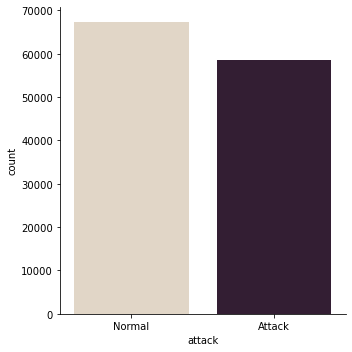

In [20]:
import seaborn as sns

sns.catplot(x="attack", kind="count", palette="ch:.25", data=Y_train.replace(attack_label))

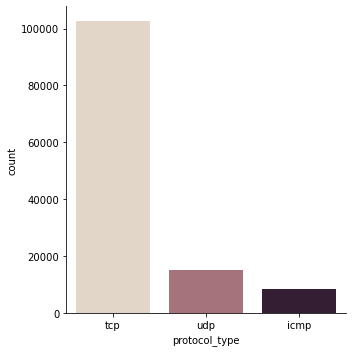

In [21]:
sns.catplot(x="protocol_type", kind="count", palette="ch:.25", data=X_train)

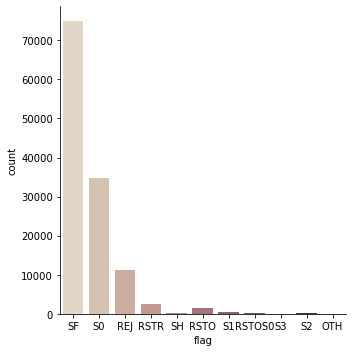

In [22]:
sns.catplot(x="flag", kind="count", palette="ch:.25", data=X_train)

<AxesSubplot:xlabel='protocol_type'>

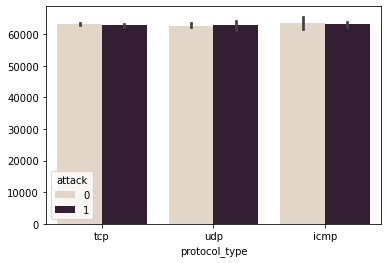

In [23]:
idx = pd.Index(range(1, 125974, 1))
sns.barplot(x="protocol_type", y=idx,hue=Y_train["attack"], palette="ch:.25", data=X_train)

<AxesSubplot:>

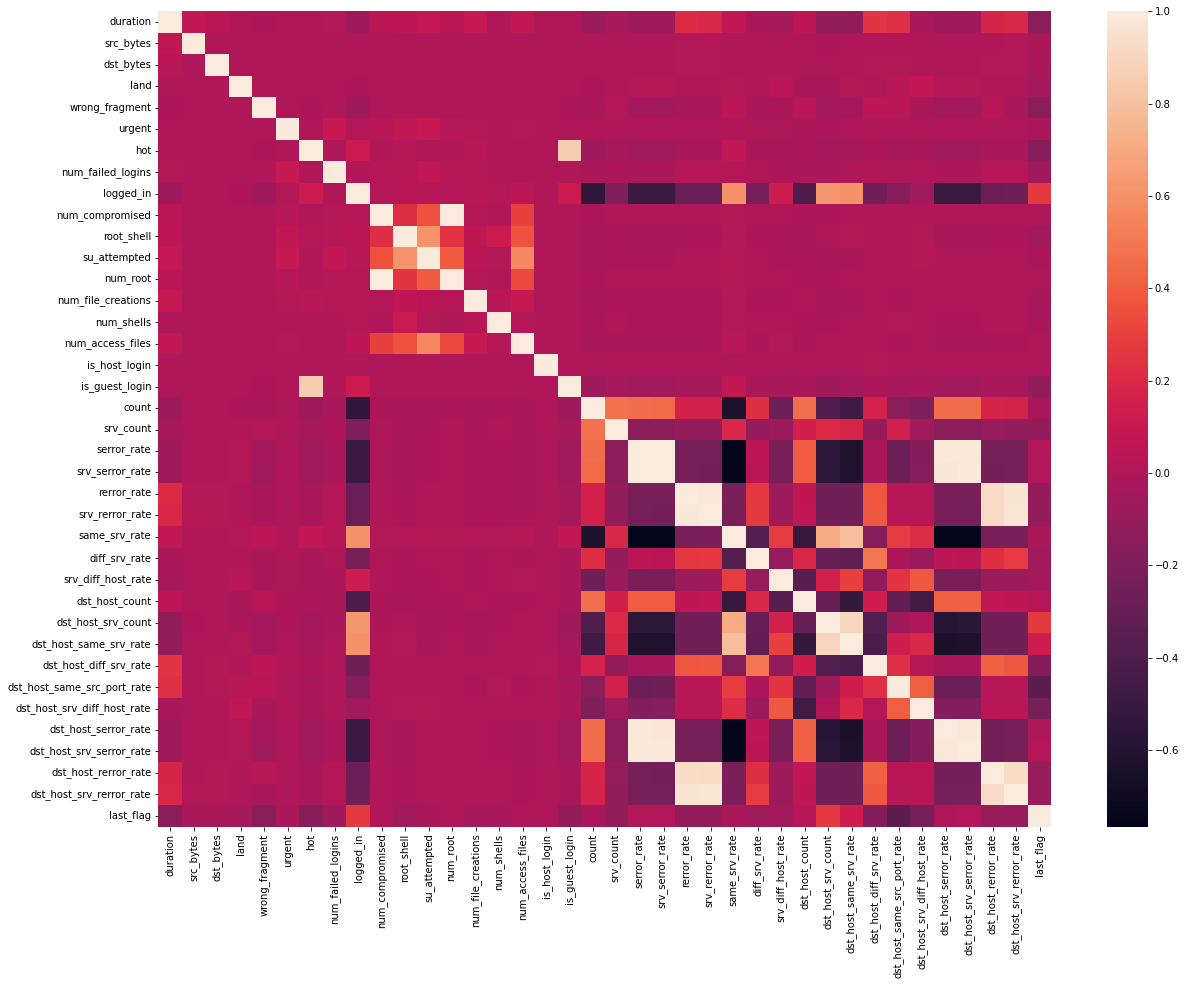

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train.corr())

# Correlation Analysis

In [25]:
df["attack"]=encodeTarget(df["attack"])
#df=oneHotEncoding(df)
#df["attack"]=df["attack"].apply(lambda x:"normal" if x==0 else "attack")
corr = df.corr()
corr_target = abs(corr["attack"])
corr_target

duration                       0.048785
src_bytes                      0.005921
dst_bytes                      0.004118
land                           0.007191
wrong_fragment                 0.095905
urgent                         0.002787
hot                            0.013083
num_failed_logins              0.003755
logged_in                      0.690171
num_compromised                0.010198
root_shell                     0.020285
su_attempted                   0.022448
num_root                       0.011452
num_file_creations             0.021271
num_shells                     0.009472
num_access_files               0.036701
is_host_login                  0.002629
is_guest_login                 0.039279
count                          0.576444
srv_count                      0.000771
serror_rate                    0.650652
srv_serror_rate                0.648289
rerror_rate                    0.253397
srv_rerror_rate                0.253504
same_srv_rate                  0.751913


Network Attack and Normal values count

In [26]:
network_Anamoly=Y_train.replace(attack_label)

count_values=dict(Counter(network_Anamoly['attack']))
print("Total Values : ",Y_train['attack'].count())
print("Normal Values : ",count_values['Normal'])
print("Network Attack Values : ",(network_Anamoly['attack'].count()-count_values['Normal']))
network_Anamoly.shape

Total Values :  125973
Normal Values :  67343
Network Attack Values :  58630


(125973, 1)

Normalize data

In [27]:
def NormaliseData(data, training=True, rs=None, num_columns=5):
    if training == True:
       
        from sklearn.preprocessing import StandardScaler
        sc=StandardScaler()
        import joblib
        joblib.dump(sc,"sc.sav")
        rs = sc.fit(data.loc[:,num_columns])
        
        data.loc[:,num_columns] = rs.transform(data.loc[:,num_columns])
    if training == False and rs !=None:
        data.loc[:,num_columns] = rs.transform(data.loc[:,num_columns])
    return data, rs
X_train_ns, rs=NormaliseData(X_train,num_columns = num_columns)
X_test_ns, rs =NormaliseData(X_test, training=False, rs=rs, num_columns = num_columns)
X_train_ns.shape,X_test_ns.shape

((125973, 41), (22544, 41))

One hot Encoding on Non target Data

In [28]:
network_ohe_train=pd.get_dummies(X_train_ns,drop_first=True)
network_ohe_test=pd.get_dummies(X_test_ns,drop_first=True)
network_ohe_train.shape,network_ohe_test.shape

((125973, 119), (22544, 113))

In [29]:
network_ohe_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0


In [30]:
network_ohe_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,1,0,0,0,0,0,0,0,0,0
1,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,1,0,0,0,0,0,0,0,0,0
2,-0.109481,-0.005551,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
3,-0.110249,-0.007759,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.109865,-0.007762,-0.004915,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,1,0,0,0,0,0,0,0,0


# Feature Selection

In [31]:
def featureSelect(data,test):
    from sklearn.tree import DecisionTreeClassifier
    model_dt = DecisionTreeClassifier(criterion = 'gini',random_state=500)
    model_dt.fit(data,test)
    
    print(data.columns[model_dt.feature_importances_ >= 0.001].unique())
    return model_dt
    
X_train=featureSelect(network_ohe_train,Y_train)

X_test=network_ohe_test[network_ohe_train.columns[X_train.feature_importances_ >= 0.001]]

X_train=network_ohe_train[network_ohe_train.columns[X_train.feature_importances_ >= 0.001]]
X_train

Index(['src_bytes', 'dst_bytes', 'hot', 'logged_in', 'count', 'serror_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_serror_rate', 'last_flag', 'protocol_type_tcp',
       'service_ecr_i', 'service_http', 'service_other', 'flag_S0', 'flag_S1'],
      dtype='object')


,src_bytes,dst_bytes,hot,logged_in,count,serror_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,last_flag,protocol_type_tcp,service_ecr_i,service_http,service_other,flag_S0,flag_S1
0,-0.007679,-0.004919,-0.095076,-0.809262,-0.717045,-0.637209,-0.782367,-0.289103,-0.624871,0.216426,1,0,0,0,0,0
1,-0.007737,-0.004919,-0.095076,-0.809262,-0.620982,-0.637209,-1.161030,-0.289103,-0.624871,-1.965556,0,0,0,1,0,0
2,-0.007762,-0.004919,-0.095076,-0.809262,0.339648,1.602664,-0.938287,-0.289103,1.618955,-0.219970,1,0,0,0,1,0
3,-0.007723,-0.002891,-0.095076,1.235694,-0.690846,-0.189235,1.066401,0.066252,-0.602433,0.652823,1,0,1,0,0,0
4,-0.007728,-0.004814,-0.095076,1.235694,-0.472521,-0.637209,1.066401,-0.289103,-0.624871,0.652823,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.007762,-0.004919,-0.095076,-0.809262,0.872361,1.602664,-0.938287,-0.289103,1.618955,0.216426,1,0,0,0,1,0
125969,-0.007744,-0.004883,-0.095076,-0.809262,-0.717045,-0.637209,0.977304,-0.289103,-0.624871,0.652823,0,0,0,0,0,0
125970,-0.007382,-0.004823,-0.095076,1.235694,-0.725778,-0.637209,-0.893738,-0.289103,-0.624871,-0.656367,1,0,0,0,0,0
125971,-0.007762,-0.004919,-0.095076,-0.809262,0.523041,1.602664,-1.094207,-0.289103,1.618955,0.216426,1,0,0,0,1,0


From Columns like
'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'count', 'serror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'last_flag', 'protocol_type_tcp', 'service_ecr_i', 'service_http', 'service_other', 'flag_S0', 'flag_S1'

we can determine is our network under attack or not We can do Binomial Classification on it .

In [32]:
X_train.columns.nunique()

16

In [33]:
X_test.head()

,src_bytes,dst_bytes,hot,logged_in,count,serror_rate,dst_host_same_srv_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,last_flag,protocol_type_tcp,service_ecr_i,service_http,service_other,flag_S0,flag_S1
0,-0.007762,-0.004919,-0.095076,-0.809262,1.265346,-0.637209,-1.071933,-0.289103,-0.624871,0.652823,1,0,0,0,0,0
1,-0.007762,-0.004919,-0.095076,-0.809262,0.453177,-0.637209,-1.161030,-0.289103,-0.624871,0.652823,1,0,0,0,0,0
2,-0.005551,-0.004919,-0.095076,-0.809262,-0.725778,-0.637209,0.197703,-0.111426,-0.624871,0.652823,1,0,0,0,0,0
3,-0.007759,-0.004919,-0.095076,-0.809262,-0.725778,-0.637209,1.066401,2.198385,-0.624871,-1.965556,0,0,0,0,0,0
4,-0.007762,-0.004915,-0.095076,-0.809262,-0.725778,-0.637209,-0.470526,-0.111426,-0.624871,-3.711143,1,0,0,0,0,0


Evaluate all modes

In [34]:
def eval_model(Y_test,Y_predict):
    from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
    f1=f1_score(Y_test,Y_predict)
    prec=precision_score(Y_test,Y_predict)
    recall=recall_score(Y_test,Y_predict)
  # Calculate Confusion Matrix
  #cf_mat=confusion_matrix(Y_test,Y_predict)
        

  # Calculate Accuracy
    acc = accuracy_score(Y_test,Y_predict)
    return f1,prec,recall, acc

<class 'sklearn.linear_model._logistic.LogisticRegression'>


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed 

F1 Score : 0.8682464454976303
Precision :  0.9214485654303709
Recall :  0.8208524896750565
Accuracy :  0.8581884315117104


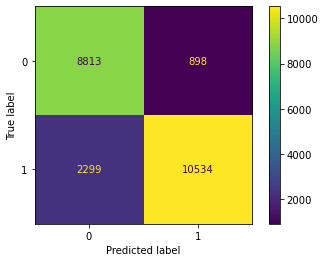

***************************

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
F1 Score : 0.833325835620136
Precision :  0.9857386121753938
Recall :  0.7217330320268059
Accuracy :  0.8356547196593329


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


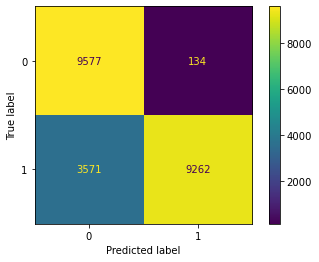

***************************

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


C:\Users\ICLUSTER\AppData\Local\Temp/ipykernel_21192/2932809030.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


F1 Score : 0.8276232701867526
Precision :  0.9730412805391744
Recall :  0.7200187017844619
Accuracy :  0.8292672107877928


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


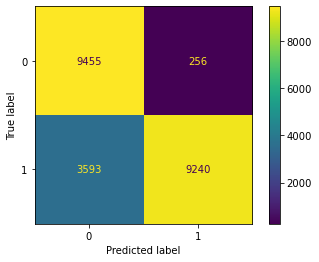

***************************

<class 'sklearn.svm._classes.SVC'>


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score : 0.846829607723754
Precision :  0.9581734081291211
Recall :  0.7586690563391257
Accuracy :  0.8437721788502484


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


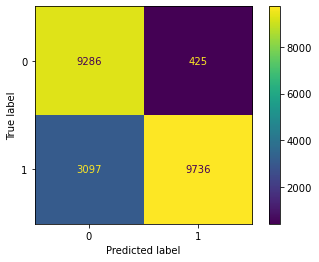

***************************

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score : 0.8170093795093795
Precision :  0.9696029112704698
Recall :  0.7059144393360867
Accuracy :  0.8199964513839603


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


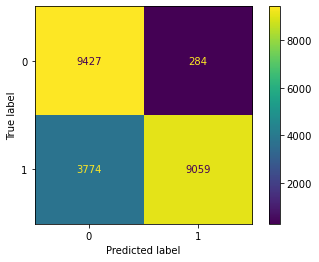

***************************

<class 'xgboost.sklearn.XGBClassifier'>
F1 Score : 0.8294386247649744
Precision :  0.9746449237243556
Recall :  0.7218888802306553
Accuracy :  0.8309971611071683


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


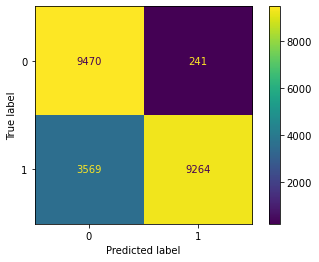

***************************

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score : 0.8456299160697807
Precision :  0.9695687222893994
Recall :  0.749785708719707
Accuracy :  0.8441713981547196


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


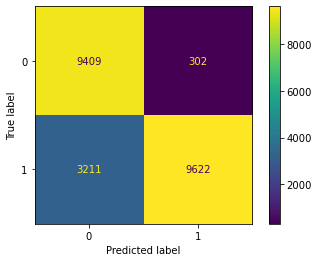

***************************



In [39]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier
import joblib
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

## Creating Model List
model_list = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),
              AdaBoostClassifier(),XGBClassifier(),GradientBoostingClassifier()]


for model in model_list:
    print(model.__class__)
  # train the model
    model.fit(X_train,Y_train)
    Y_pred_train=model.predict(X_train)
    
  # test the model on X_test
    Y_predict = model.predict(X_test)
    
    ## Saving model
    model_name = type(model).__name__
    model_save=model_name+"StdSc.sav"
    joblib.dump(model,model_save)
    
    ## Evaluating Model
    f1,prec,recall, acc = eval_model(Y_test,Y_predict)
    
    #Print Results
    print("F1 Score :",f1)
    print("Precision : ",prec)
    print("Recall : ",recall)
    print("Accuracy : ",acc)
    
    plot_confusion_matrix(model, X_test, Y_test)  
    plt.show()
    print("***************************")
    print()

Applying ANN(Artificial Neural Network)

In [40]:
n_features = X_train.shape[1]
n_features

16

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=(n_features,)))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
##increased acc after this
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='relu'))

#model1.add(Dense(64, activation='relu'))
#model1.add(Dense(10, activation='relu'))



# model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [42]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                6

Compiling ANN model

In [43]:
# compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # mse mae

In [44]:
es = EarlyStopping(monitor='loss', mode='min',patience=5, verbose=1)

In [45]:
# fit the model (traning)
history = model1.fit( X_train, Y_train, epochs=200,validation_split=0.3, batch_size=128, verbose=2,callbacks=[es],shuffle=False)

Epoch 1/200
689/689 - 2s - loss: 0.0678 - accuracy: 0.9807 - val_loss: 0.0305 - val_accuracy: 0.9873
Epoch 2/200
689/689 - 1s - loss: 0.0296 - accuracy: 0.9887 - val_loss: 0.0259 - val_accuracy: 0.9898
Epoch 3/200
689/689 - 1s - loss: 0.0270 - accuracy: 0.9893 - val_loss: 0.0250 - val_accuracy: 0.9904
Epoch 4/200
689/689 - 1s - loss: 0.0248 - accuracy: 0.9900 - val_loss: 0.0240 - val_accuracy: 0.9908
Epoch 5/200
689/689 - 1s - loss: 0.0236 - accuracy: 0.9905 - val_loss: 0.0234 - val_accuracy: 0.9911
Epoch 6/200
689/689 - 1s - loss: 0.0227 - accuracy: 0.9908 - val_loss: 0.0220 - val_accuracy: 0.9913
Epoch 7/200
689/689 - 1s - loss: 0.0218 - accuracy: 0.9910 - val_loss: 0.0222 - val_accuracy: 0.9913
Epoch 8/200
689/689 - 1s - loss: 0.0211 - accuracy: 0.9911 - val_loss: 0.0215 - val_accuracy: 0.9917
Epoch 9/200
689/689 - 1s - loss: 0.0203 - accuracy: 0.9914 - val_loss: 0.0211 - val_accuracy: 0.9919
Epoch 10/200
689/689 - 1s - loss: 0.0199 - accuracy: 0.9917 - val_loss: 0.0214 - val_accura

Evaluate Model

In [46]:
# evaluate the model
loss, acc = model1.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.838


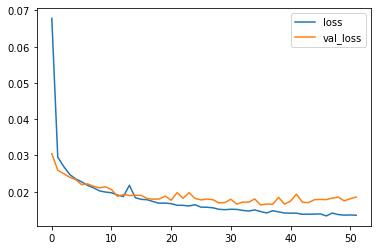

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss","val_loss"])

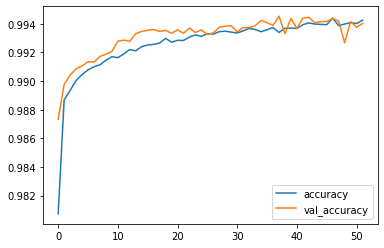

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])

In [49]:
from sklearn.metrics import classification_report
y_predicted = model1.predict(X_test)
y_predicted = np.round(y_predicted)   
print("Classification Report: \n", classification_report(y_predicted,Y_test))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.74      0.84     12547
         1.0       0.75      0.96      0.84      9997

    accuracy                           0.84     22544
   macro avg       0.85      0.85      0.84     22544
weighted avg       0.86      0.84      0.84     22544



In [50]:
model1.save("ANN.h5")

Adaboost FineTuning

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=100; total time=  13.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=100; total time=  34.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=100; total time=  20.8s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=150; total time=  20.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=150; total time= 1.2min


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=150; total time=  39.3s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=200; total time=  34.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=200; total time= 1.6min


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.1, n_estimators=200; total time=  47.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=100; total time=  27.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=100; total time= 1.2min


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=100; total time=  17.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=150; total time=  34.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=150; total time= 1.7min


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=150; total time=  24.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=200; total time=  43.3s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=200; total time= 2.3min


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.09, n_estimators=200; total time=  33.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=100; total time=  19.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=100; total time=  23.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=100; total time=  18.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=150; total time=  28.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=150; total time=  31.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=150; total time=  24.7s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=200; total time=  36.7s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=200; total time=  35.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.9, n_estimators=200; total time=  33.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=100; total time=  25.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=100; total time=  27.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=100; total time=  24.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=150; total time=  36.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=150; total time=  38.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=150; total time=  37.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=200; total time=  46.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=200; total time=  53.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END base_estimator=DecisionTreeClassifier(), learning_rate=0.01, n_estimators=200; total time=  51.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'base_estimator': DecisionTreeClassifier(), 'learning_rate': 0.01, 'n_estimators': 100}
[0.99874576 0.9986505  0.9986902  0.99861875 0.99849968 0.99846793
 0.99888865 0.99882515 0.99886484 0.99898391 0.99882515 0.99879339]
0.9987378247719749
F1 Score : 0.83496102499776
Precision :  0.9820845189166403
Recall :  0.7261747058365152
Accuracy :  0.8365862313697658


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


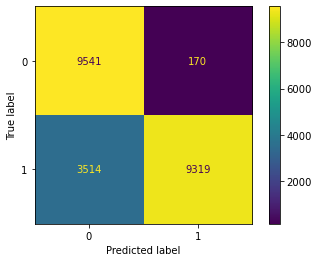

['Adboost_SC2.sav']

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = { 
    'n_estimators': [100,150,200],
    'base_estimator' : [DecisionTreeClassifier()],
    'learning_rate':[0.1,0.09,0.9,0.01],
    }

ada = AdaBoostClassifier(random_state=500)

CV_abc = GridSearchCV(estimator=ada, param_grid=param_grid,\
                      
                       cv=3,verbose=2)

CV_abc.fit(X_train, Y_train)

print(CV_abc.best_params_)
print(CV_abc.cv_results_['mean_test_score'])
print(sum(CV_abc.cv_results_['mean_test_score'])/ len(CV_abc.cv_results_['mean_test_score']))


Y_predict = CV_abc.predict(X_test)
    

f1,prec,recall, acc = eval_model(Y_test,Y_predict)
print("F1 Score :",f1)
print("Precision : ",prec)
print("Recall : ",recall)
print("Accuracy : ",acc)

plot_confusion_matrix(CV_abc, X_test, Y_test)  
plt.show()
joblib.dump(CV_abc,"Adboost_SC2.sav")

Finetuning XGBOOSt

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   5.0s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   5.1s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   5.3s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=150; total time=   8.1s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=150; total time=   8.8s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=150; total time=   8.8s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   6.1s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   6.1s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   6.2s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=   9.5s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=   9.5s
[CV] END ..learning_rate=0.01, max_depth=7, n_e

[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=150; total time=   9.0s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=   6.6s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=   6.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=   6.4s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time=   9.3s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time=   9.7s
[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time=  10.0s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   6.7s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   6.8s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=   6.8s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=   9.9s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=  10.1s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.9, max_depth=9, n_estimators=150; total time=   8.1s
[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=100; total time=   6.7s
[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=100; total time=   6.4s
[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=100; total time=   5.7s
[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=150; total time=   9.1s
[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=150; total time=   9.2s
[CV] END ..learning_rate=0.9, max_depth=10, n_estimators=150; total time=  10.4s
[CV] END ..learning_rate=0.02, max_depth=6, n_estimators=100; total time=   7.6s
[CV] END ..learning_rate=0.02, max_depth=6, n_estimators=100; total time=   6.3s
[CV] END ..learning_rate=0.02, max_depth=6, n_estimators=100; total time=   7.2s
[CV] END ..learning_rate=0.02, max_depth=6, n_estimators=150; total time=   9.5s
[CV] END ..learning_rate=0.02, max_depth=6, n_estimators=150; total time=   9.4s
[CV] END ..learning_rate=0.0

C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


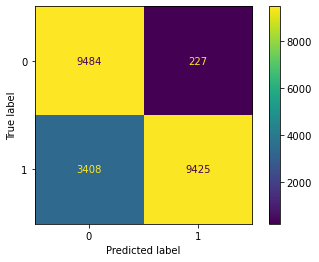

['XGBOOST_FineTuned_SC.sav']

In [53]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = { 
    'n_estimators': [100,150],
    'learning_rate':[0.01,0.001,0.009,0.1,0.2,0.09,0.9,0.02,1.1],
    'max_depth':[6,7,8,9,10]
}
xgb = XGBClassifier(random_state=500)

CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,\
                      
                       cv=3,verbose=2)

CV_xgb.fit(X_train, Y_train)

print(CV_xgb.best_params_)
print(CV_xgb.cv_results_['mean_test_score'])
print(sum(CV_xgb.cv_results_['mean_test_score'])/ len(CV_xgb.cv_results_['mean_test_score']))


Y_predict = CV_xgb.predict(X_test)

    
# test the model  on data (X_test)
 
f1,prec,recall, acc = eval_model(Y_test,Y_predict)
print("F1 Score :",f1)
print("Precision : ",prec)
print("Recall : ",recall)
print("Accuracy : ",acc)
plot_confusion_matrix(CV_xgb,X_test, Y_test)  
plt.show()
joblib.dump(CV_xgb,"XGBOOST_FineTuned_SC.sav")

# Fine Tuning GradientBoost Classifier

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=  25.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=  21.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=  19.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=  35.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=  36.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=150; total time=  34.7s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=100; total time=  27.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=100; total time=  27.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=100; total time=  22.8s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=150; total time=  32.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=150; total time=  39.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=8, n_estimators=150; total time=  37.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=  28.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=  31.3s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=100; total time=  27.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=150; total time=  42.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=150; total time=  45.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.01, max_depth=9, n_estimators=150; total time=  40.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=100; total time=  24.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=100; total time=  24.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=100; total time=  23.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=150; total time=  38.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=150; total time=  37.7s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=7, n_estimators=150; total time=  34.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=100; total time=  27.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=100; total time=  27.3s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=100; total time=  24.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=150; total time=  40.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=150; total time=  40.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=8, n_estimators=150; total time=  36.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=100; total time=  22.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=100; total time=  26.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=100; total time=  24.3s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=150; total time=  36.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=150; total time=  44.8s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.001, max_depth=9, n_estimators=150; total time=  39.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=100; total time=  24.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=100; total time=  24.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=100; total time=  23.7s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=150; total time=  31.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=150; total time=  29.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=7, n_estimators=150; total time=  27.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=100; total time=  21.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=100; total time=  21.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=100; total time=  19.7s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=150; total time=  31.7s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=150; total time=  32.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=8, n_estimators=150; total time=  29.7s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=100; total time=  22.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=100; total time=  32.3s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=100; total time=  21.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=150; total time=  33.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=150; total time=  35.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .learning_rate=0.009, max_depth=9, n_estimators=150; total time=  31.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=  19.7s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=  20.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=  19.8s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=150; total time=  33.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=150; total time=  30.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=150; total time=  40.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=  28.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=  26.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=100; total time=  27.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time=  36.3s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time=  37.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=8, n_estimators=150; total time=  45.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  31.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  33.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=100; total time=  30.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=  48.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=  52.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=150; total time=  50.3s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=100; total time=  27.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=100; total time=  25.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=100; total time=  24.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=150; total time=  38.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=150; total time=  37.5s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=7, n_estimators=150; total time=  38.1s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=100; total time=  28.6s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=100; total time=  23.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=100; total time=  21.9s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=150; total time=  37.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=150; total time=  43.3s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=8, n_estimators=150; total time=  43.7s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=100; total time=  31.0s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=100; total time=  31.7s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=100; total time=  31.8s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=150; total time=  49.3s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=150; total time=  49.4s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..learning_rate=0.09, max_depth=9, n_estimators=150; total time=  47.2s


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.09, 'max_depth': 8, 'n_estimators': 100}
[0.9960309  0.99624523 0.99651513 0.99666595 0.9980472  0.99830916
 0.99367325 0.99383201 0.99510213 0.99596739 0.99721369 0.99738833
 0.99577687 0.99624523 0.99655482 0.99669771 0.99811864 0.99828535
 0.99914267 0.99919824 0.99922206 0.99922999 0.99915061 0.99919824
 0.99913474 0.99922206 0.99924587 0.99920618 0.99920618 0.99920618]
0.997567732768133
F1 Score : 0.8497208913893893
Precision :  0.9745916515426497
Recall :  0.7532143692043949
Accuracy :  0.8483410220014195


C:\Users\ICLUSTER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


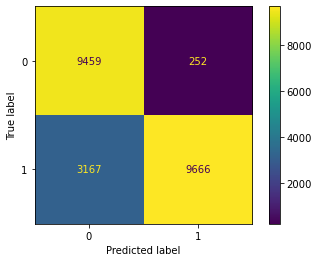

['GradBOOST_FineTuned_SC.sav']

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


param_grid = { 
    'n_estimators': [100,150],
    'learning_rate':[0.01,0.001,0.009,0.1,0.09],
    'max_depth':[7,8,9]
}
gb = GradientBoostingClassifier(random_state=500)

CV_gb = GridSearchCV(estimator=gb, param_grid=param_grid,\
                      
                       cv=3,verbose=2)

CV_gb.fit(X_train, Y_train)

print(CV_gb.best_params_)
print(CV_gb.cv_results_['mean_test_score'])
print(sum(CV_gb.cv_results_['mean_test_score'])/ len(CV_gb.cv_results_['mean_test_score']))


Y_predict = CV_gb.predict(X_test)

#test the model on data X_test

f1,prec,recall, acc = eval_model(Y_test,Y_predict)
print("F1 Score :",f1)
print("Precision : ",prec)
print("Recall : ",recall)
print("Accuracy : ",acc)

#Plotting Confusion Matrix
plot_confusion_matrix(CV_gb, X_test, Y_test)  
plt.show()
joblib.dump(CV_gb,"GradBOOST_FineTuned_SC.sav")